# Imports

In [893]:
%matplotlib inline

import cPickle as pickle

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.regularizers import l1, l2, l1l2

import matplotlib.pyplot as plt
import numpy as np

# Utilities

In [507]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = 'binary'
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)

In [513]:
import numpy.ma as ma

def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols

    plt.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

# Data

In [1139]:
f = open('output.pkl', 'rb')
(X_train, Y_train), (X_test, Y_test) = pickle.load(f)
f.close()

In [1140]:
X_train = np.array(X_train).astype("float32")
Y_train = np.array(Y_train).astype("float32")
X_test = np.array(X_test).astype("float32")
Y_test = np.array(Y_test).astype("float32")

In [1141]:
print(X_train.shape, Y_train.shape, 'train samples')
print(X_test.shape, Y_test.shape, 'test samples')

((100000, 54), (100000, 6), 'train samples')
((10000, 54), (10000, 6), 'test samples')


# Model

In [1157]:
model = Sequential()
model.add(Dense(54, 256, activation='relu', init='normal'))
model.add(Dense(256, 1024, activation='relu', init='normal'))
model.add(Dense(1024, 6, init='normal'))

In [1158]:
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer='rmsprop')

# Fit

In [1159]:
batch_size = 100
nb_epoch = 20
validation_split = 0.1
shuffle = True

history = model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=batch_size, shuffle=shuffle, validation_split=validation_split)

Train on 90000 samples, validate on 10000 samples
Epoch 0
90000/90000 [==============================] - 10s - loss: 0.2792 - val_loss: 0.2341
Epoch 1
90000/90000 [==============================] - 11s - loss: 0.2224 - val_loss: 0.2179
Epoch 2
90000/90000 [==============================] - 10s - loss: 0.2026 - val_loss: 0.1967
Epoch 3
90000/90000 [==============================] - 11s - loss: 0.1838 - val_loss: 0.1808
Epoch 4
90000/90000 [==============================] - 12s - loss: 0.1668 - val_loss: 0.1669
Epoch 5
90000/90000 [==============================] - 12s - loss: 0.1495 - val_loss: 0.1504
Epoch 6
90000/90000 [==============================] - 6s - loss: 0.1299 - val_loss: 0.1296
Epoch 7
90000/90000 [==============================] - 6s - loss: 0.1108 - val_loss: 0.1119
Epoch 8
90000/90000 [==============================] - 8s - loss: 0.0931 - val_loss: 0.0930
Epoch 9
90000/90000 [==============================] - 13s - loss: 0.0782 - val_loss: 0.0841
Epoch 10
90000/90000 [=

# Save

In [1165]:
open('model.json', 'w').write(model.to_json())
model.save_weights('weights.hdf5', overwrite=True)

# Evaluate

In [1166]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s     


0.047496449744701387

# Loss

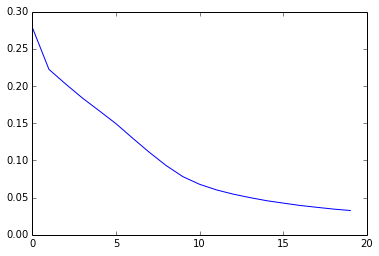

In [1167]:
plt.plot(history.history['loss'])

# Weights

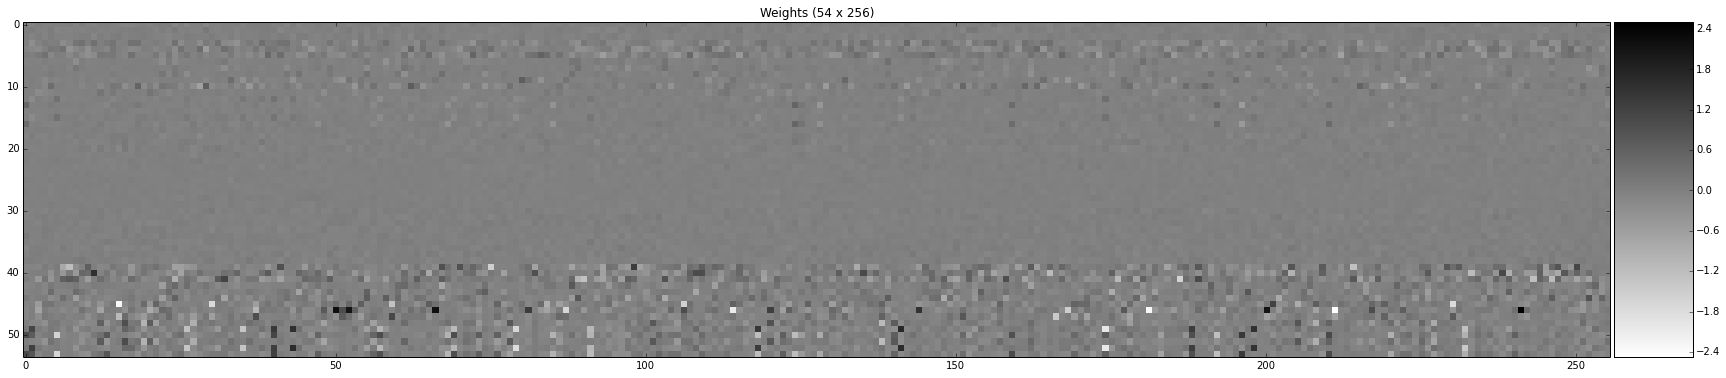

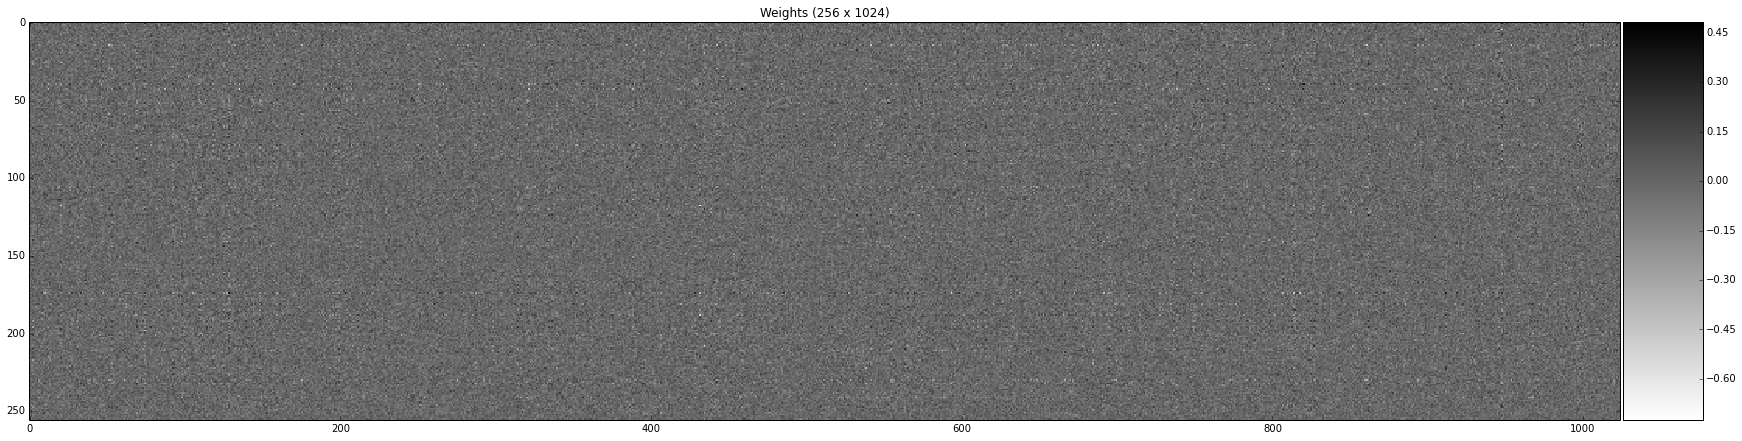

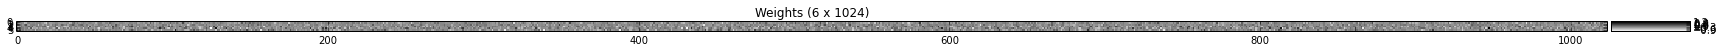

In [1170]:
W = np.squeeze(model.layers[0].W.get_value())
plt.figure(figsize=(30, 6))
plt.title('Weights (%d x %d)' % W.shape)
nice_imshow(plt.gca(), W)

W = np.squeeze(model.layers[1].W.get_value())
plt.figure(figsize=(30, 30))
plt.title('Weights (%d x %d)' % W.shape)
nice_imshow(plt.gca(), W)

W = np.squeeze(model.layers[2].W.get_value().T)
plt.figure(figsize=(30, 1))
plt.title('Weights (%d x %d)' % W.shape)
nice_imshow(plt.gca(), W)

# Graph

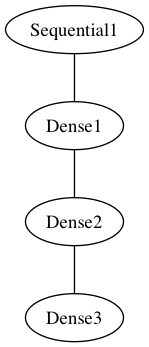

In [1169]:
from keras.utils.dot_utils import Grapher
from IPython.display import Image

grapher = Grapher()
grapher.plot(model, 'model.png')

Image(filename='model.png') 